In [36]:
# import pandas as pd
# cm_features_v4 = pd.read_csv(f'data/cm_features_v0.4.csv')
# cm_features_v5 = pd.read_csv(f'data/cm_features_v0.5.csv')
# cm_features_v6 = pd.read_csv(f'data/cm_features_v0.6.csv')
# print(cm_features_v4.shape)
# print(cm_features_v5.shape)
# print(cm_features_v6.shape)

In [37]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Path to the submission folder
base_path = "../submission"

# List of metrics
metrics = ['crps', 'ign', 'mis']

# Dictionary to hold all data
all_data = {}

# Process each metric
for metric in metrics:
    # Find all CSV files within the nested directories for each metric
    submission_files = glob.glob(f"{base_path}/**/{metric}.csv", recursive=True)

    # Dictionary to hold the dataframes grouped by submission name and year
    submissions = {}

    # Read each CSV file and store the dataframe in the dictionary grouped by submission name and year
    for file in submission_files:
        df = pd.read_csv(file)
        parts = file.split('/')
        submission_name = parts[2].replace('_', ' ').title()  # Adjust index based on your file path structure
        year = parts[5].split('=')[1]  # Extract year from the 'window=YYear' part
        if submission_name not in submissions:
            submissions[submission_name] = {}
        if year not in submissions[submission_name]:
            submissions[submission_name][year] = []
        submissions[submission_name][year].append(df['value'].mean())  # Store mean values

    # Merge the metric means into the all_data dictionary
    for submission_name, years_data in submissions.items():
        if submission_name not in all_data:
            all_data[submission_name] = {}
        for year, mean_values in years_data.items():
            if year not in all_data[submission_name]:
                all_data[submission_name][year] = {}
            all_data[submission_name][year][metric] = mean_values[0]  # There should be exactly one mean per metric

# Convert all_data to DataFrame
data_frames = {}
for submission, years_data in all_data.items():
    for year, metrics_data in years_data.items():
        index = (submission, year)
        data_frames[index] = metrics_data

# Create a multi-index DataFrame
result_df = pd.DataFrame.from_dict(data_frames, orient='index')
result_df.index = pd.MultiIndex.from_tuples(result_df.index, names=['Submission', 'Year'])

# Display the DataFrame
result_df

crps  \
Submission                                         Year                
Bm Last Historical Poisson                         Y2022  131.017135   
                                                   Y2023  678.959777   
                                                   Y2019    9.480041   
                                                   Y2021   85.605461   
                                                   Y2020   23.698109   
                                                   Y2018   20.173457   
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crps... Y2024   19.096082   
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crps... Y2022  116.891369   
                                                   Y2024   25.729953   
Bm Boot 240                                        Y2022  120.249169   
                                                   Y2023   52.722147   
                                                   Y2019   22.457582   
                                                   Y2021   86.626316   
                                                   Y2020   31.417437   
                                                   Y2018   23.577316   
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crps... Y2022  117.197781   
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crps... Y2022  119.568809   
Bm Zero                                            Y2022  120.968150   
                                                   Y2023   53.543194   
                                                   Y2019   23.018761   
                                                   Y2021   87.339005   
                                                   Y2020   32.040576   
                                                   Y2018   24.130454   
Bm Conflictology                                   Y2022  123.995164   
                                                   Y2023   50.356712   
                                                   Y2019    9.146306   
                                                   Y2021   76.849476   
                                                   Y2020   21.339332   
                                                   Y2018   14.482875   
Ng Boost Cm V2.4 Pw 14 Normal D 20 N 300 S Crps... Y2022  119.205311   
Ng Boost Cm V2.4 Pw 14 Normal D 20 N 300 S Crps... Y2022  117.230738   

                                                               ign  \
Submission                                         Year              
Bm Last Historical Poisson                         Y2022  1.124429   
                                                   Y2023  1.124699   
                                                   Y2019  1.045585   
                                                   Y2021  1.227781   
                                                   Y2020  1.110316   
                                                   Y2018  1.198439   
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crps... Y2024  1.110706   
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crps... Y2022  0.739714   
                                                   Y2024  1.258269   
Bm Boot 240                                        Y2022  1.154555   
                                                   Y2023  1.154135   
                                                   Y2019  1.111029   
                                                   Y2021  1.152036   
                                                   Y2020  1.115448   
                                                   Y2018  1.123216   
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crps... Y2022  0.736016   
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crps... Y2022  1.163126   
Bm Zero                                            Y2022  1.632058   
                                                   Y2023  1.614664   
                                                   Y2019  1.558130   
                                                   Y2021  1.614664   
                                                   Y2020  1.549433   
       

In [38]:
# You may need to comment this out if you have only one year, as otherwise KeyError for non-existing year is thrown
try:
    submissions_2018 = result_df.xs('Y2018', level='Year').sort_values(by='crps')
except KeyError:
    print('No 2018 data')
    submissions_2018 = None
submissions_2018

,crps,ign,mis
Submission,,,
Bm Conflictology,14.482875,0.640281,186.553578
Bm Last Historical Poisson,20.173457,1.198439,380.623037
Bm Boot 240,23.577316,1.123216,454.089616
Bm Zero,24.130454,1.558130,482.609075


In [39]:
try:
    submissions_2019 = result_df.xs('Y2019', level='Year').sort_values(by='crps')
except KeyError:
    print('No 2019 data')
    submissions_2019 = None
submissions_2019

,crps,ign,mis
Submission,,,
Bm Conflictology,9.146306,0.610132,89.057941
Bm Last Historical Poisson,9.480041,1.045585,172.686169
Bm Boot 240,22.457582,1.111029,426.005912
Bm Zero,23.018761,1.558130,460.375218


In [40]:
try:
    submissions_2020 = result_df.xs('Y2020', level='Year').sort_values(by='crps')
except KeyError:
    print('No 2020 data')
    submissions_2020 = None
submissions_2020

,crps,ign,mis
Submission,,,
Bm Conflictology,21.339332,0.566535,344.964311
Bm Last Historical Poisson,23.698109,1.110316,455.806457
Bm Boot 240,31.417437,1.115448,606.002792
Bm Zero,32.040576,1.549433,640.811518


In [41]:
try:
    submissions_2021 = result_df.xs('Y2021', level='Year').sort_values(by='crps')
except KeyError:
    print('No 2021 data')
    submissions_2021 = None
submissions_2021

,crps,ign,mis
Submission,,,
Bm Conflictology,76.849476,0.685623,1435.554625
Bm Last Historical Poisson,85.605461,1.227781,1690.710864
Bm Boot 240,86.626316,1.152036,1708.304188
Bm Zero,87.339005,1.614664,1746.780105


In [42]:
try:
    submissions_2022 = result_df.xs('Y2022', level='Year').sort_values(by='crps')
except KeyError:
    print('No 2022 data')
    submissions_2022 = None
submissions_2022

,crps,ign,mis
Submission,,,
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crpscore C T M T Bsd 5 Mbf 0.5 Dli 0 Log T,116.891369,0.739714,2302.605519
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crpscore C F M T Bsd 5 Mbf 0.5 Dli 0 Log T,117.197781,0.736016,2295.180803
Ng Boost Cm V2.4 Pw 14 Normal D 20 N 300 S Crpscore C T M T Bsd 5 Mbf 0.5 Dli 35 Log T,117.230738,0.940518,2284.810602
Ng Boost Cm V2.4 Pw 14 Normal D 20 N 300 S Crpscore C T M T Bsd 5 Mbf 0.5 Dli 35 Log F,119.205311,1.013362,2265.233573
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crpscore C F M T Bsd 5 Mbf 0.5 Dli 0 Log F,119.568809,1.163126,2266.999127
Bm Boot 240,120.249169,1.154555,2380.743565
Bm Zero,120.968150,1.632058,2419.363002
Bm Conflictology,123.995164,0.694711,2142.128098
Bm Last Historical Poisson,131.017135,1.124429,2599.278338


In [43]:
try:
    submissions_2023 = result_df.xs('Y2023', level='Year').sort_values(by='crps')
except KeyError:
    print('No 2023 data')
    submissions_2023 = None
submissions_2023

,crps,ign,mis
Submission,,,
Bm Conflictology,50.356712,0.682261,1042.916143
Bm Boot 240,52.722147,1.154135,1030.986889
Bm Zero,53.543194,1.614664,1070.863874
Bm Last Historical Poisson,678.959777,1.124699,13523.463264


In [44]:
# find submissions that span over all 5 years
submissions_all_years = result_df.groupby('Submission').count()
submissions_all_years

,crps,ign,mis
Submission,,,
Bm Boot 240,6,6,6
Bm Conflictology,6,6,6
Bm Last Historical Poisson,6,6,6
Bm Zero,6,6,6
Ng Boost Cm V2.4 Pw 14 Normal D 20 N 300 S Crpscore C T M T Bsd 5 Mbf 0.5 Dli 35 Log F,1,1,1
Ng Boost Cm V2.4 Pw 14 Normal D 20 N 300 S Crpscore C T M T Bsd 5 Mbf 0.5 Dli 35 Log T,1,1,1
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crpscore C F M T Bsd 5 Mbf 0.5 Dli 0 Log F,1,1,1
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crpscore C F M T Bsd 5 Mbf 0.5 Dli 0 Log T,1,1,1
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crpscore C T M T Bsd 5 Mbf 0.5 Dli 0 Log F,1,1,1


In [45]:
submissions_all_years = submissions_all_years[submissions_all_years['crps'] == 5]
# calculate average crps, ign, mis over all years
submissions_all_years['crps_avg'] = result_df.groupby('Submission')['crps'].mean()
submissions_all_years['ign_avg'] = result_df.groupby('Submission')['ign'].mean()
submissions_all_years['mis_avg'] = result_df.groupby('Submission')['mis'].mean()
submissions_all_years = submissions_all_years.sort_values(by='crps_avg')

submissions_all_years[['crps_avg', 'ign_avg', 'mis_avg']]

/var/folders/88/v5lhf14x1r5bv01kg4dwr5780000gn/T/ipykernel_75390/3631299626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submissions_all_years['crps_avg'] = result_df.groupby('Submission')['crps'].mean()
/var/folders/88/v5lhf14x1r5bv01kg4dwr5780000gn/T/ipykernel_75390/3631299626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submissions_all_years['ign_avg'] = result_df.groupby('Submission')['ign'].mean()
/var/folders/88/v5lhf14x1r5bv01kg4dwr5780000gn/T/ipykernel_75390/3631299626.py:5: SettingWit

,crps_avg,ign_avg,mis_avg
Submission,,,
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crpscore C T M T Bsd 5 Mbf 0.5 Dli 0 Log F,19.096082,1.110706,242.108966
Bm Conflictology,49.361644,0.646591,873.529116
Bm Boot 240,56.174995,1.135070,1101.022160
Bm Zero,56.840023,1.587847,1136.800465
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crpscore C T M T Bsd 5 Mbf 0.5 Dli 0 Log T,71.310661,0.998991,1342.246640
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crpscore C F M T Bsd 5 Mbf 0.5 Dli 0 Log T,117.197781,0.736016,2295.180803
Ng Boost Cm V2.4 Pw 14 Normal D 20 N 300 S Crpscore C T M T Bsd 5 Mbf 0.5 Dli 35 Log T,117.230738,0.940518,2284.810602
Ng Boost Cm V2.4 Pw 14 Normal D 20 N 300 S Crpscore C T M T Bsd 5 Mbf 0.5 Dli 35 Log F,119.205311,1.013362,2265.233573
Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crpscore C F M T Bsd 5 Mbf 0.5 Dli 0 Log F,119.568809,1.163126,2266.999127


In [46]:
PLOT_FIGURES = False
if PLOT_FIGURES:

    import os
    import glob
    import pandas as pd
    import matplotlib.pyplot as plt

    # Path to the submission folder
    base_path = "../submission"

    metrics = ['crps', 'ign', 'mis']

    for metric in metrics:
        # Find all CSV files within the nested directories
        submission_files = glob.glob(f"{base_path}/**/{metric}.csv", recursive=True)
        print(submission_files)

        # Dictionary to hold the dataframes grouped by submission name and year
        submissions = {}

        # Read each CSV file and store the dataframe in the dictionary grouped by submission name and year
        for file in submission_files:
            df = pd.read_csv(file)
            parts = file.split('/')
            submission_name = parts[2].replace('_', ' ').title()  # Adjust index based on your file path structure
            year = parts[5].split('=')[1]  # Extract year from the 'window=YYear' part
            if submission_name not in submissions:
                submissions[submission_name] = {}
            submissions[submission_name][year] = df

        # Create a figure for each submission
        for submission_name, years_data in submissions.items():
            num_years = len(years_data)
            plt.figure(figsize=(10, 5))
            plt.suptitle(f'{metric.upper()} Histograms for {submission_name}')

            # Create subplots for each year in a 2x2 grid
            for index, (year, df) in enumerate(sorted(years_data.items()), start=1):
                plt.subplot(2, 2, index)
                plt.hist(df['value'], bins=100, alpha=0.75, label=f'Year: {year}')
                mean_value = df['value'].mean()
                plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=1)
                plt.title(f'Year: {year[1:]}')
                plt.xlabel(metric.upper())
                plt.ylabel('Frequency')
                # log
                plt.yscale('log')
                # plt.xscale('log')
                # mean_value = sub['value'].mean()
                # plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=1)
                plt.legend([f'Mean: {mean_value:.1f}'])

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to not overlap with the suptitle
            plt.show()


# Best Model

In [47]:
years: list[str] = ['Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022', 'Y2023']

In [48]:
benchmarks = result_df.loc[list(set([index for index in result_df.index.to_list() if 'Bm' in index[0]]))]
predictions = result_df.loc[list(set([index for index in result_df.index.to_list() if 'Boost' in index[0]]))]

In [49]:
models: list[str] = list({index[0] for index in predictions.index})

In [50]:
benchmarks_mins: list[float] = []

for year in years:
    benchmarks_year = benchmarks.loc[list(set([index for index in benchmarks.index.to_list() if index[1] == year]))]
    benchmarks_mins.append(benchmarks_year['crps'].min())

In [51]:
(
    predictions
    .loc[
        [index for index in predictions.index.to_list() if index[1] == 'Y2021' and index[
            0] == 'Ng Boost Cm V2.4 Pw 14 Normal D 20 N 300 S Crpscore C F M T Bsd 5 Mbf 0.5 Dli 35 Log T']
    ]
    ['crps']
    .values
    [0]
)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
models

In [52]:
scores: dict[str, tuple[int, float]] = {}

for model in models:
    pred_sum: float = .0
    score: int = 0
    diffs: list[float] = []

    for i, year in enumerate(years):
        prediction = (
            predictions
            .loc[
                [index for index in predictions.index.to_list() if index[1] == year and index[0] == model]
            ]
            ['crps']
            .values
            [0]
        )

        pred_sum += prediction
        if prediction < benchmarks_mins[i]:
            diffs.append(prediction - benchmarks_mins[i])
            score += 1

    scores[model] = (score, pred_sum / len(years), diffs)

for model, score in zip(scores.keys(), scores.values()):
    print('-' * 32)
    print(model)
    print(score)
print('-' * 32)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [53]:
for year in years:
    predictions_year = predictions.loc[list(set([index for index in predictions.index.to_list() if index[1] == year]))]
    print(predictions_year[predictions_year['crps'] == predictions_year['crps'].min()].index[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [54]:
best_model = 'Ng Boost Cm V2.5 Pw 14 Normal D 20 N 300 S Crpscore C F M T Bsd 5 Mbf 0.5 Dli 0 Log F'

# Plots

In [55]:
best_model_preds: list[float] = (
    predictions
    .loc[[index for index in predictions.index.to_list() if index[0] == best_model]]
    ['crps']
    .sort_index()
    .to_list()
)
best_model_preds

[119.56880927356022]

In [56]:
news = [
    23.4649634966269,
    22.377350533740533,
    32.29989332306505,
    96.76587886250475,
    137.1217659362756,
    58.808471417815895
]

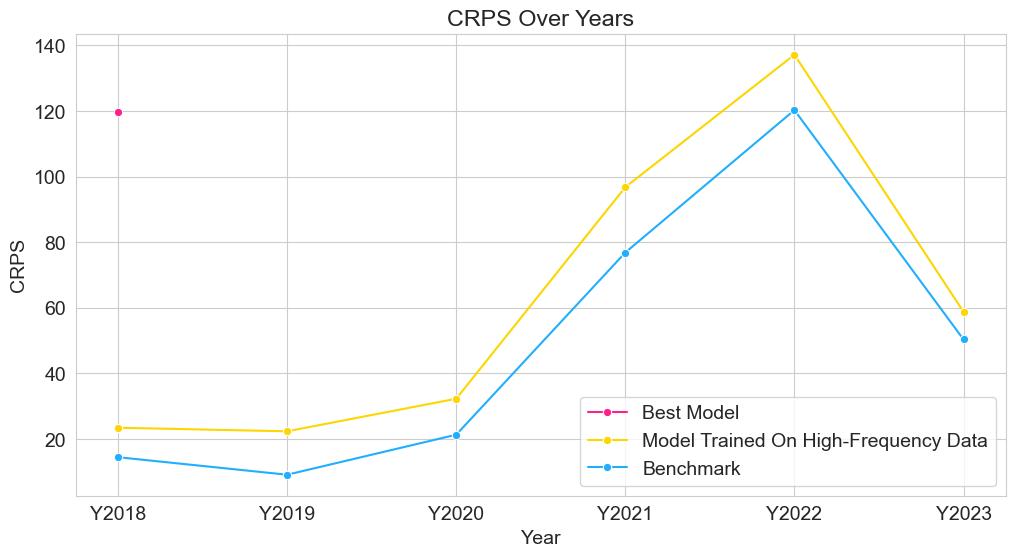

In [57]:
import seaborn as sns

plt.rcParams.update({'font.size': 14})

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=pd.DataFrame([years, best_model_preds]),
    x=pd.Series(years),
    y=pd.Series(best_model_preds),
    label='Best Model',
    marker='o',
    color=(254 / 256, 33 / 256, 139 / 256)
)
sns.lineplot(
    data=pd.DataFrame([years, news]),
    x=pd.Series(years),
    y=pd.Series(news),
    label='Model Trained On High-Frequency Data',
    marker='o',
    color=(254 / 256, 215 / 256, 0 / 256)
)
sns.lineplot(
    data=pd.DataFrame([years, benchmarks_mins]),
    x=pd.Series(years),
    y=pd.Series(benchmarks_mins),
    label='Benchmark',
    marker='o',
    color=(33 / 256, 176 / 256, 254 / 256)
)

plt.legend()

plt.xlabel('Year')
plt.ylabel('CRPS')
plt.title('CRPS Over Years')

plt.savefig('../figures/best_model_over_years.png')
plt.show()